# DATA COLLECTION AND PREPARATION

In [ ]:
import re

In [ ]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from cStringIO import StringIO

In [ ]:
def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = file(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [ ]:
lone=convert_pdf_to_txt('doc_3Trademark_Transfer_Agreement.pdf')

In [ ]:
f=open('xxx.txt','w')
f.write(lone)
f.close()

In [ ]:
with open('xxx.txt') as f:
    clean_cont = f.read().splitlines()

In [ ]:
clean_cont

['TRADEMARK AND DOMAIN NAME AGREEMENT ',
 '',
 'This agreement (the \xe2\x80\x9cAgreement\xe2\x80\x9d) is by and between ____________________________ ',
 '',
 ' ',
 ' ',
 '(\xe2\x80\x9cParty\xe2\x80\x9d) and Eclipse Foundation, Inc. (\xe2\x80\x9cEclipse\xe2\x80\x9d) and is effective as of [______] [_____],  ',
 '201[__] (the \xe2\x80\x9cEffective Date\xe2\x80\x9d). ',
 ' ',
 '',
 'WHEREAS, Party is the owner of certain trademarks identified in Exhibit A (the ',
 '',
 '\xe2\x80\x9cTrademarks\xe2\x80\x9d) and of certain domain names identified in Exhibit A (the \xe2\x80\x9cDomain Names\xe2\x80\x9d); ',
 '',
 ' ',
 'WHEREAS, Party is desirous of Eclipse to initiate a project or working group with a ',
 '',
 'name based on the Trademark (the \xe2\x80\x9cProject Initiation\xe2\x80\x9d); ',
 '',
 ' ',
 'WHEREAS, to accommodate the Project Initiation, Party desires to transfer all of Party\xe2\x80\x99s ',
 '',
 'rights, title and interest in and to the Trademarks to Eclipse and to thereafter 

In [ ]:
shear=[i.replace('\xe2\x80\x9c','') for i in clean_cont ]
shear=[i.replace('\xe2\x80\x9d','') for i in shear ]
shear=[i.replace('\xe2\x80\x99s','') for i in shear ]

shears = [x for x in shear if x != ' ']
shearss = [x for x in shears if x != '']

In [ ]:
shear

['TRADEMARK AND DOMAIN NAME AGREEMENT ',
 '',
 'This agreement (the Agreement) is by and between ____________________________ ',
 '',
 ' ',
 ' ',
 '(Party) and Eclipse Foundation, Inc. (Eclipse) and is effective as of [______] [_____],  ',
 '201[__] (the Effective Date). ',
 ' ',
 '',
 'WHEREAS, Party is the owner of certain trademarks identified in Exhibit A (the ',
 '',
 'Trademarks) and of certain domain names identified in Exhibit A (the Domain Names); ',
 '',
 ' ',
 'WHEREAS, Party is desirous of Eclipse to initiate a project or working group with a ',
 '',
 'name based on the Trademark (the Project Initiation); ',
 '',
 ' ',
 'WHEREAS, to accommodate the Project Initiation, Party desires to transfer all of Party ',
 '',
 'rights, title and interest in and to the Trademarks to Eclipse and to thereafter have certain ',
 'continuing usage rights of the Trademarks; ',
 '',
 ' ',
 'WHEREAS, to accommodate the Project Initiation, the Parties may mutually agree to ',
 'have any related 

In [ ]:
shears

['TRADEMARK AND DOMAIN NAME AGREEMENT ',
 '',
 'This agreement (the Agreement) is by and between ____________________________ ',
 '',
 '(Party) and Eclipse Foundation, Inc. (Eclipse) and is effective as of [______] [_____],  ',
 '201[__] (the Effective Date). ',
 '',
 'WHEREAS, Party is the owner of certain trademarks identified in Exhibit A (the ',
 '',
 'Trademarks) and of certain domain names identified in Exhibit A (the Domain Names); ',
 '',
 'WHEREAS, Party is desirous of Eclipse to initiate a project or working group with a ',
 '',
 'name based on the Trademark (the Project Initiation); ',
 '',
 'WHEREAS, to accommodate the Project Initiation, Party desires to transfer all of Party ',
 '',
 'rights, title and interest in and to the Trademarks to Eclipse and to thereafter have certain ',
 'continuing usage rights of the Trademarks; ',
 '',
 'WHEREAS, to accommodate the Project Initiation, the Parties may mutually agree to ',
 'have any related Domain Names initially redirect to a

In [ ]:
shearss

['TRADEMARK AND DOMAIN NAME AGREEMENT ',
 'This agreement (the Agreement) is by and between ____________________________ ',
 '(Party) and Eclipse Foundation, Inc. (Eclipse) and is effective as of [______] [_____],  ',
 '201[__] (the Effective Date). ',
 'WHEREAS, Party is the owner of certain trademarks identified in Exhibit A (the ',
 'Trademarks) and of certain domain names identified in Exhibit A (the Domain Names); ',
 'WHEREAS, Party is desirous of Eclipse to initiate a project or working group with a ',
 'name based on the Trademark (the Project Initiation); ',
 'WHEREAS, to accommodate the Project Initiation, Party desires to transfer all of Party ',
 'rights, title and interest in and to the Trademarks to Eclipse and to thereafter have certain ',
 'continuing usage rights of the Trademarks; ',
 'WHEREAS, to accommodate the Project Initiation, the Parties may mutually agree to ',
 'have any related Domain Names initially redirect to a URL designated by Eclipse and that the ',
 '

In [ ]:
dubby=[re.sub("[^a-zA-Z]+", " ", s) for s in shearss]

In [ ]:
dubby

['TRADEMARK AND DOMAIN NAME AGREEMENT ',
 'This agreement the Agreement is by and between ',
 ' Party and Eclipse Foundation Inc Eclipse and is effective as of ',
 ' the Effective Date ',
 'WHEREAS Party is the owner of certain trademarks identified in Exhibit A the ',
 'Trademarks and of certain domain names identified in Exhibit A the Domain Names ',
 'WHEREAS Party is desirous of Eclipse to initiate a project or working group with a ',
 'name based on the Trademark the Project Initiation ',
 'WHEREAS to accommodate the Project Initiation Party desires to transfer all of Party ',
 'rights title and interest in and to the Trademarks to Eclipse and to thereafter have certain ',
 'continuing usage rights of the Trademarks ',
 'WHEREAS to accommodate the Project Initiation the Parties may mutually agree to ',
 'have any related Domain Names initially redirect to a URL designated by Eclipse and that the ',
 'Domain Names are subsequently transferred to Eclipse ',
 'In consideration of the

# TOPIC MODELLING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/Topic Modeling Trial Conservations/Transcripts/16-41.txt') as f:
    dubby = f.read().split(".")

In [ ]:
dubby

['This is Harsh I understand from my home light 360 friend that you have a few questions for me',
 ' So this is my call to you',
 ' I hope you are doing fine and let me know how I can help you are what questions are you today? 10 security and protection my information information is protected in in so that it is a complex object, but I am trying to I am I tried to break it down',
 'I think your daughter me about physical data protection not necessary and the different subject, which is how do we keep it',
 ' How do you keep your privacy protect your data from malicious hackers of people who want to see your data administrator themselves as you sorry',
 ' Main concern is that we are on a w has probably the best authentication that there is on the face of the planet',
 ' Unfortunately',
 " I haven't seen them pioneering after authentication algorithm other people do that",
 ' But the way has picked up those authentication and data security and handmade',
 "You need to wear on environment

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
%pylab
%matplotlib inline


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [ ]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [ ]:
vect=CountVectorizer(ngram_range=(1,2),stop_words='english')

In [ ]:
dtm=vect.fit_transform(dubby)

In [ ]:
dtm

<47x798 sparse matrix of type '<type 'numpy.int64'>'
	with 954 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(dtm.toarray(),columns=vect.get_feature_names())

,10,10 security,19,19 dates,2007,2007 things,30,30 minutes,360,360 friend,40,40 minutes,90,90 days,absolutely,accept,accept got,access,access namelyyour,access tell,access use,acknowledge,acknowledge external,activate,activate change,activity,activity analyses,actually,actually 90,actually tell,actually weather,administrator,administrator sorry,adrenal,adrenal watch,agreement,agreement shall,agreement urgent,algorithm,algorithm people,...,want connect,want data,want know,want like,want naked,want racial,wanted,wanted make,watch,watch tv,water,water behaving,way,way picked,way successful,ways,ways staff,wear,wear environment,weather,weather today,week,week don,week week,whatbuy,whatbuy sell,whatso,whatso help,wish,wish human,words,words actually,words service,work,workings,workings cycle,world,world natural,years,years bf
0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0


In [ ]:
lda=LatentDirichletAllocation(n_components=6)

In [ ]:
lda.fit_transform(dtm)

array([[0.01190514, 0.01192435, 0.01191075, 0.94044914, 0.0119055 ,
        0.01190513],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.00438966, 0.00439211, 0.97803864, 0.00439873, 0.00438848,
        0.00439238],
       [0.01043391, 0.0104321 , 0.01045407, 0.01045464, 0.0104172 ,
        0.94780808],
       [0.95824413, 0.00836001, 0.00836448, 0.00835511, 0.00833372,
        0.00834254],
       [0.94044454, 0.01190493, 0.01190511, 0.01192506, 0.01190539,
        0.01191497],
       [0.08333492, 0.08333416, 0.08333503, 0.08333463, 0.58332638,
        0.08333489],
       [0.01390389, 0.01388911, 0.01392041, 0.93049328, 0.01388969,
        0.01390362],
       [0.01390765, 0.01390536, 0.01391972, 0.93043384, 0.01388967,
        0.01394376],
       [0.00309058, 0.00309056, 0.00309035, 0.00309417, 0.00308658,
        0.98454776],
       [0.01666706, 0.01666687, 0.91665912, 0.01666699, 0.01666743,
        0.01667253],
       [0.91662154, 0

In [ ]:
lda_dtf=lda.fit_transform(dtm)

In [ ]:
import numpy as np
sorting=np.argsort(lda.components_)[:,::-1]
features=np.array(vect.get_feature_names())

In [ ]:
pip install mglearn

     |████████████████████████████████| 542kB 3.4MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=f513bc65f0cf87b28b6ad031fb2b93529f523b603961cbf8c33f671cedf7c525
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import mglearn
mglearn.tools.print_topics(topics=range(6), feature_names=features,
sorting=sorting, topics_per_chunk=6, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       topic 5       
--------      --------      --------      --------      --------      --------      
coffee        data          information   people        data          days          
data          don           tell          data          thank         90 days       
talk          information   know          lot           don           90            
speaking      statistical   just          days          share data    change        
bad           want          want          90 days       share         ok            
coffee bad    necessary     like          90            say           doing         
absolutely    just          going         know          security      week          
say           statistical analysissiri          ok            satisfied     human         
look          companies     private       allowed       sorry         period        
authenticationanalysis      keeping       don           sel

In [ ]:
Agreement_Topic=np.argsort(lda_dtf[:,2])[::-1]
for i in Agreement_Topic[:4]:
    print(b".".join(dubby[i].split(b".")[:2]) + b".\n")

 We are in certain cases VR for other marketing efforts, but we just because we sing that the trade off in our own branding and reduced by keeping your personal information private is much more than whatBuy sell your name tell you so so the idea behind saying that is not just to tell you through out empty words, but actually tell you we make more money by keeping your data private we are vested interest your Information Officer artificial neural occurrences Data Encryption message to keep safe.

 We are going to come up with only chat for just like Siri you can speak to humri, you can type a text and the what difference between Siri and humri is that he is going to be personalized which we can get this done by the force, which means that lets you start the thing on your phone and you press the button and harmony ask you what you want to know and you sayMy coffee is good for diabetes and you know who you are and hamleys want something like this.

 I hope you are doing fine and let me kn

In [ ]:
Domain_Name_Topic=np.argsort(lda_dtf[:,4])[::-1]
for i in Domain_Name_Topic[:4]:
    print(b".".join(dubby[i].split(b".")[:2]) + b".\n")

You need to wear on environment is icing in a manner of speaking words from so many other service provided that we have the double factor authentication and security measures that just come along with us and unless I mean I could do that discussion with you, but most cases people are satisfied when I say that we are happy with what are the security that doesn't work for you.

 How do you keep your privacy protect your data from malicious hackers of people who want to see your data administrator themselves as you sorry.

How to get satisfied with the operations of the app so far is Mathura well-functioning fantastic sofa, thank you.

 And you ask question and example how we can you tell me the route to go to turn back in say to you just I am sorry.



# VISUALIZATION OF TOPICS


In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 3.2MB/s 
     |████████████████████████████████| 552kB 15.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=79c7475766bbe957316ce932e80ba9c60a0dd884c93ee46acced0c12c1e4c360
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=8ed05ef97a6db8ff87395eafd038c6d35aca70909874f729537c9610fa296393
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
from __future__ import  print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
zit=pyLDAvis.sklearn.prepare(lda,dtm,vect)

In [ ]:
pyLDAvis.show(zit)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8888/    [Ctrl-C to exit]

stopping Server...


In [ ]:
pyLDAvis.display(zit)

# WORDCLOUD

In [ ]:
%pylab
%matplotlib inline
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [ ]:
d = path.dirname(__name__)

In [ ]:
text = open(path.join(d, '/content/drive/My Drive/Topic Modeling Trial Conservations/Transcripts/16-41.txt')).read()

In [ ]:
alice_mask = np.array(Image.open(path.join(d, "Nigeria.png")))

IOError: ignored

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
wc = WordCloud(background_color="black", max_words=2000, stopwords=stopwords)
#  mask=alice_mask,

In [ ]:
wc.generate(text)

In [ ]:
wc.to_file(path.join(d, "alice.png"))

NameError: ignored

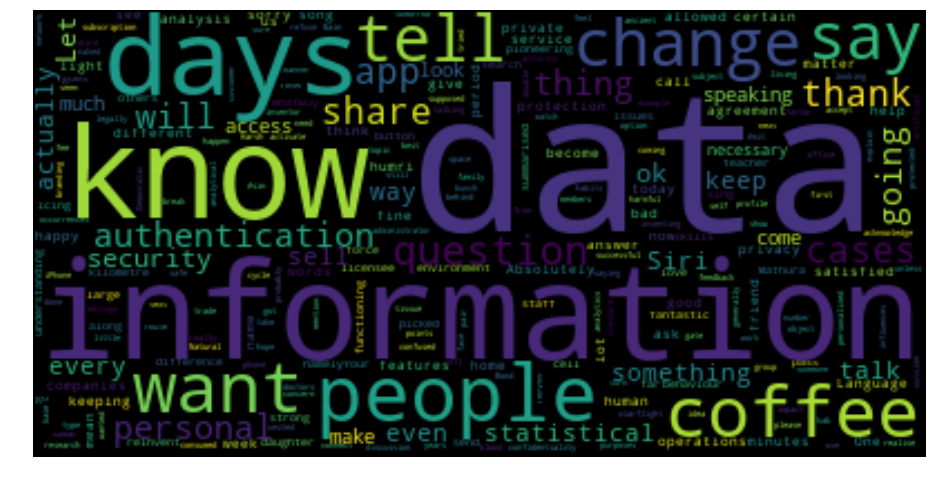

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()